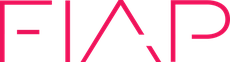

<center>
    <span style="color: #ed145b; font-size: 16pt; font-family: Arial, Helvetica, sans-serif; display: inline-flex; align-items: center;">Faculdade de Informática e Administração Paulista</span>
    <br/><br/>
    <span style="color: #ed145b; font-size: 12pt; font-family: Arial, Helvetica, sans-serif; display: inline-flex; align-items: center;">Inteligência Artificial e Computacional</span>
</center>

<span style="font-size: 12pt; font-family: 'Courier New', Courier, monospace;" >
    <center><strong>Integrantes:</strong></center>
    <table cellspacing="0" cellpadding="2" style="font-size: 12pt; font-family: 'Courier New', Courier, monospace;">
        <tr>
            <td>Bruno Jin Nakagawa</td>
            <td>RM82107</td>
        </tr>
        <tr>
            <td>Luca Alexandre Parra Pinto</td>
            <td>RM82617</td>
        </tr>
        <tr>
            <td>Lucca D'Alessio</td>
            <td>RM80877</td>
        </tr>
        <tr>
            <td>Matheus Wilson Queiroz</td>
            <td>RM82008</td>
        </tr>
        <tr>
            <td>Rodrigo Nascimento de Souza</td>
            <td>RM81948</td>
        </tr>
        <tr>
            <td>Thais Helena Fernandes Marques</td>
            <td>RM83621</td>
        </tr>
      </table>
</span>

# Pump it Up


## Introdução

Realizar análise exploratória do conjuntos de dados da Taarifa, uma plataforma open source para a geração de relatórios e a triagem de informações relacionadas à infraestrutura. Ele possuem projetos na Tanzania, entre outros parceiros.

O conjunto de dados disponibilizado pela Taarifa provem de uma parceira com o Ministério das Águas da Tanzânia.

Na lista abaixo estão todas as funcionalidades dos campos presentes no csv: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/#features_list

## Objetivo

Analisar e identificar questões semânticas sobre esses conjuntos de dados. As análises foram criadas em Python3 e discutidas entre os integrantes da equipe para chegar em um consenso.

### Questões

**1.** Poços que possuem alguma forma de pagamento possuem melhor qualidade e quantidade da água (payment_type X quality_group X quantity_group)

**2.** Que tipos de fonte possuem melhor qualidade e quantidade da água (source_type X quality_group X quantity_group)

**3.** Correlação entree a disponibilidade e a população em torno da fonte (population X amount_tsh)

#### Bibliotecas
A biblioteca Pandas foi utlizada para extrair as informações do _dataset_ e iniciar as análises

In [54]:
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#### Importando o _dataset_

In [2]:
dataset = pd.read_csv("data/pumpit.csv", index_col=0)

In [50]:
dataset.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [57]:
dataset.groupby('payment_type').quality_group.value_counts()

payment_type  quality_group
annually      good              3384
              salty              164
              unknown             45
              fluoride            23
              colored             13
              milky               13
monthly       good              7834
              salty              371
              unknown             37
              colored             28
              milky               19
              fluoride            11
never pay     good             21770
              salty             2366
              unknown            563
              colored            327
              milky              217
              fluoride           105
on failure    good              3650
              salty              181
              unknown             41
              milky               21
              colored             18
              fluoride             3
other         good               895
              salty              103
          

In [58]:
dataset.groupby('payment_type').quantity_group.value_counts()

payment_type  quantity_group
annually      enough             2678
              insufficient        563
              seasonal            203
              dry                 179
              unknown              19
monthly       enough             5262
              insufficient       2318
              dry                 362
              seasonal            332
              unknown              26
never pay     enough            13067
              insufficient       6731
              dry                3133
              seasonal           2196
              unknown             221
on failure    enough             2170
              insufficient       1076
              dry                 347
              seasonal            298
              unknown              23
other         enough              670
              insufficient        192
              seasonal            114
              dry                  72
              unknown               6
per bucket    enough 

In [51]:
dataset.groupby('source_type').quality_group.value_counts()

source_type           quality_group
borehole              good              8646
                      salty             2503
                      unknown            647
                      milky               69
                      colored             44
                      fluoride            40
dam                   good               552
                      colored             60
                      unknown             30
                      salty               14
other                 good               146
                      salty               74
                      unknown             43
                      colored             14
                      milky                1
rainwater harvesting  good              2208
                      unknown             47
                      salty               36
                      milky                3
                      colored              1
river/lake            good             10006
                   

In [52]:
dataset.groupby('source_type').quantity_group.value_counts()

source_type           quantity_group
borehole              enough             7229
                      insufficient       2680
                      dry                1472
                      unknown             285
                      seasonal            283
dam                   enough              372
                      insufficient        180
                      dry                  65
                      seasonal             30
                      unknown               9
other                 enough              134
                      insufficient         68
                      dry                  36
                      unknown              28
                      seasonal             12
rainwater harvesting  seasonal           1182
                      insufficient        644
                      enough              295
                      dry                 150
                      unknown              24
river/lake            enough             61

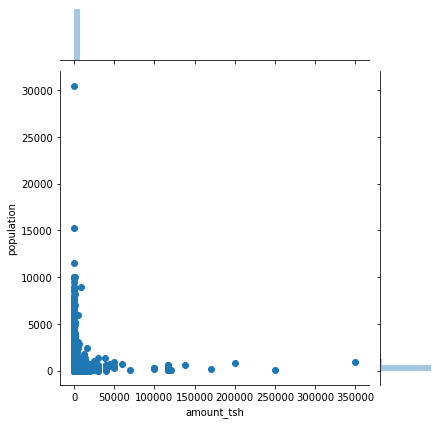

In [55]:
sns.jointplot(x='amount_tsh', y='population',
              data=dataset, kind='scatter');

In [56]:
dataset.loc[:,['amount_tsh','population']].corr(method="spearman")

,amount_tsh,population
amount_tsh,1.000000,0.342656
population,0.342656,1.000000
